In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
pd.set_option('display.max_columns', None)

# Combine Data from ThermoGlobe with Lucazeau

In [2]:
ThermoGlobe_Cut = pd.read_csv('GlobalHFDBAdd.csv')
print(len(ThermoGlobe_Cut))
ThermoGlobe_Cut.head()

869


,site_name,latitude,longitude,elevation,dip,well_depth,sediment_thickness,basin,sub_basin,domain,province,tectonic_environment,bottom_hole_temp,top_hole_temp,depth_min,depth_max,age_min,age_max,age_method,heatflow_reliability,heatflow_corrected,heatflow_corrected_uncertainty,heatflow_uncorrected,heatflow_uncorrected_uncertainty,gradient_corrected,gradient_corrected_uncertainty,gradient_uncorrected,gradient_uncorrected_uncertainty,thermal_conductivity,conductivity_uncertainty,conductivity__number_of_measurementsy,conductivity__method,heatgeneration__value,heatgeneration__uncertainty,heatgeneration__number_of_measurements,heatgeneration__method,author,year,doi,operator,cruise,comment,index
0,Kipini-1,-2.400000,40.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250.0,3632.0,NaN,NaN,NaN,B,NaN,NaN,37.0,NaN,NaN,NaN,22.0,NaN,1.70,NaN,48.0,divided bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1190
1,Pate-1,-2.066667,41.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200.0,3735.0,NaN,NaN,NaN,B,NaN,NaN,49.0,NaN,NaN,NaN,28.0,NaN,1.80,NaN,50.0,divided bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1283
2,Dodori-1,-1.816667,41.183333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,4282.0,NaN,NaN,NaN,B,NaN,NaN,50.0,NaN,NaN,NaN,25.0,NaN,2.00,NaN,66.0,divided bar,NaN,NaN,NaN,NaN,Haenel,1972.0,NaN,NaN,NaN,NaN,2424
3,Aggeneys AG 140,-29.220000,18.745000,883.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,670.0,NaN,NaN,NaN,A,NaN,NaN,57.0,19.0,NaN,NaN,11.7,NaN,4.89,1.58,8.0,divided bar,2.80,0.8,17.0,NaN,Halunen,1973.0,NaN,NaN,NaN,NaN,2402
4,Puts-berg POG 32,-29.341667,19.641667,1030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345.0,512.0,NaN,NaN,NaN,A,NaN,NaN,104.0,27.0,NaN,NaN,17.3,NaN,6.00,1.54,20.0,divided bar,2.05,NaN,4.0,NaN,Pribnow,2000.0,NaN,NaN,NaN,NaN,3714


In [3]:
print('tectonic_environment:', ThermoGlobe_Cut['tectonic_environment'].unique())

tectonic_environment: [nan 19.]


In [4]:
ThermoGlobe_Cut_new = ThermoGlobe_Cut[['longitude', 'latitude', 'heatflow_uncorrected', 'heatflow_corrected']]

In [5]:
ThermoGlobe_Cut_new.heatflow_corrected.fillna(-999)
HF=[]
for i in range(len(ThermoGlobe_Cut_new)):
    if ThermoGlobe_Cut_new.iloc[i,3]!= -999:
        HF.append(ThermoGlobe_Cut_new.iloc[i,3])
    else: HF.append(ThermoGlobe_Cut_new.iloc[i,2])
ThermoGlobe_Cut_new['HF']= HF

C:\Users\sungw686\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [6]:
ThermoGlobe_Cut_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 5 columns):
longitude               869 non-null float64
latitude                869 non-null float64
heatflow_uncorrected    823 non-null float64
heatflow_corrected      53 non-null float64
HF                      53 non-null float64
dtypes: float64(5)
memory usage: 34.0 KB


Text(0, 0.5, 'Lat')

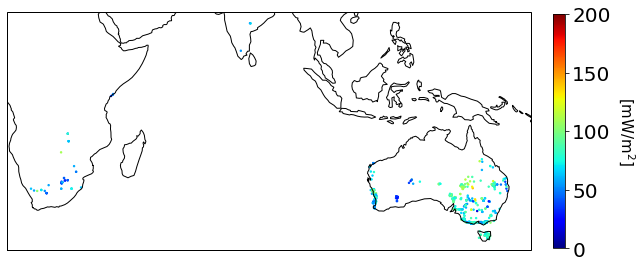

In [7]:
Lon = ThermoGlobe_Cut.iloc[:,2]
Lat = ThermoGlobe_Cut.iloc[:,1]
HF = ThermoGlobe_Cut.iloc[:,22]
#Difference = np.sqrt((HF_measured - HF_modelled)**2)

cmap = plt.get_cmap('jet')
fig1 = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(Lon,Lat,c=HF,cmap=cmap, marker='o', s=2, vmin=0, vmax=200)
cb1 = plt.colorbar(fraction=0.021, pad=0.04)
cb1.ax.tick_params(labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cb1.set_label('[mW/m$^2$]', labelpad=25, fontsize=15, rotation=270)
#plt.xlim([160,170])
#plt.ylim([-40,-50])
plt.xlabel('Lon', fontsize=20)
plt.ylabel('Lat', fontsize=20)
#fig1.savefig('HeatFlux_ThermoGlobe_Cut.png', dpi=300)

In [2]:
Lucazeau = pd.read_csv('NGHF_corrected.csv')
Lucazeau.info()
print(len(Lucazeau.))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69388 entries, 0 to 69387
Data columns (total 25 columns):
country                        69388 non-null object
code1                          69335 non-null object
code2                          68980 non-null object
code3                          69060 non-null object
code4                          68980 non-null object
code5                          68964 non-null object
code6                          69206 non-null object
Name of site                   69327 non-null object
longitude                      69334 non-null float64
latitude                       69334 non-null float64
elevation (m)                  69102 non-null float64
minimum depth (m)              18255 non-null float64
maximum depth (m)              37101 non-null float64
number of temperatures         20769 non-null float64
temperature gradient (mK/m)    40289 non-null float64
number of conductivities       11478 non-null float64
conductivity                   4066

In [3]:
Lucazeau_new = Lucazeau[['longitude', 'latitude', 'heatflow', 'code6']]

In [4]:
Lucazeau_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69388 entries, 0 to 69387
Data columns (total 4 columns):
longitude    69334 non-null float64
latitude     69334 non-null float64
heatflow     68985 non-null float64
code6        69206 non-null object
dtypes: float64(3), object(1)
memory usage: 2.1+ MB


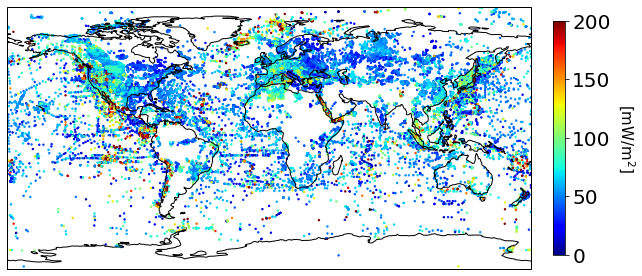

In [5]:
Lon = Lucazeau_new.iloc[:,0]
Lat = Lucazeau_new.iloc[:,1]
HF = Lucazeau_new.iloc[:,2]

cmap = plt.get_cmap('jet')
fig1 = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(Lon,Lat,c=HF,cmap=cmap, marker='o', s=2, vmin=0, vmax=200)
cb1 = plt.colorbar(fraction=0.021, pad=0.04)
cb1.ax.tick_params(labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cb1.set_label('[mW/m$^2$]', labelpad=25, fontsize=15, rotation=270)
#plt.xlim([105,160])
#plt.ylim([-45,-8])
plt.xlabel('Lon', fontsize=20)
plt.ylabel('Lat', fontsize=20)
fig1.savefig('HeatFlux_Lucazeau.png', dpi=300)

61213
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61213 entries, 0 to 61212
Data columns (total 42 columns):
site_name                                 46168 non-null object
latitude                                  61213 non-null float64
longitude                                 61213 non-null float64
elevation                                 30127 non-null float64
dip                                       603 non-null float64
well_depth                                0 non-null float64
sediment_thickness                        1771 non-null float64
basin                                     0 non-null float64
sub_basin                                 0 non-null float64
domain                                    0 non-null float64
province                                  0 non-null float64
tectonic_environment                      1095 non-null float64
bottom_hole_temp                          1038 non-null float64
top_hole_temp                             2978 non-null float64
de

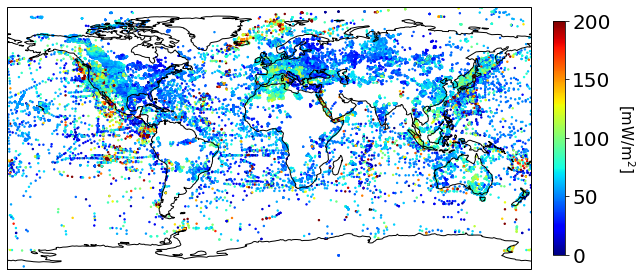

In [8]:
ThermoGlobe_all = pd.read_csv('ThermoGlobe_25_05_20.csv')

Lon = ThermoGlobe_all.longitude
Lat = ThermoGlobe_all.latitude
HF = ThermoGlobe_all.heatflow_uncorrected

print(len(HF))

cmap = plt.get_cmap('jet')
fig1 = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(Lon,Lat,c=HF,cmap=cmap, marker='o', s=2, vmin=0, vmax=200)
cb1 = plt.colorbar(fraction=0.021, pad=0.04)
cb1.ax.tick_params(labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cb1.set_label('[mW/m$^2$]', labelpad=25, fontsize=15, rotation=270)
#plt.xlim([105,160])
#plt.ylim([-45,-8])
plt.xlabel('Lon', fontsize=20)
plt.ylabel('Lat', fontsize=20)
fig1.savefig('HeatFlux_ThermoGlobe_all.png', dpi=300)

ThermoGlobe_all.info()

In [12]:
Lucazeau_and_ThermoGlobe_new = Lucazeau_new.append(ThermoGlobe_Cut_new)
Lucazeau_and_ThermoGlobe_new_new = Lucazeau_and_ThermoGlobe_new[['longitude', 'latitude', 'heatflow', 'HF', 'code6']]
Lucazeau_and_ThermoGlobe_new_new = Lucazeau_and_ThermoGlobe_new_new.loc[(Lucazeau_and_ThermoGlobe_new_new['latitude']>=-50)]
Lucazeau_and_ThermoGlobe_new_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69793 entries, 0 to 868
Data columns (total 5 columns):
longitude    69792 non-null float64
latitude     69793 non-null float64
heatflow     68574 non-null float64
HF           53 non-null float64
code6        68795 non-null object
dtypes: float64(4), object(1)
memory usage: 3.2+ MB


C:\Users\sungw686\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Text(0, 0.5, 'Lat')

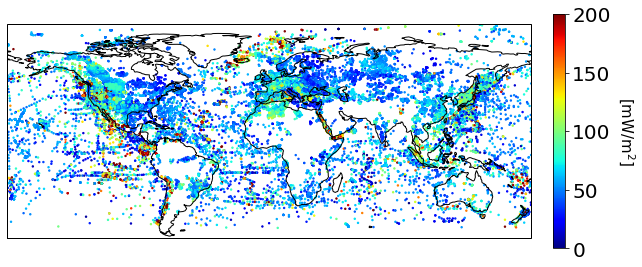

In [13]:
Lon = Lucazeau_and_ThermoGlobe_new_new.longitude
Lat = Lucazeau_and_ThermoGlobe_new_new.latitude
HF = Lucazeau_and_ThermoGlobe_new_new.heatflow

cmap = plt.get_cmap('jet')
fig1 = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(Lon,Lat,c=HF,cmap=cmap, marker='o', s=2, vmin=0, vmax=200)
cb1 = plt.colorbar(fraction=0.021, pad=0.04)
cb1.ax.tick_params(labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cb1.set_label('[mW/m$^2$]', labelpad=25, fontsize=15, rotation=270)
#plt.xlim([105,160])
#plt.ylim([-45,-8])
plt.xlabel('Lon', fontsize=20)
plt.ylabel('Lat', fontsize=20)

Insert Ricarda Dziadek Measurements

In [14]:
GHF_ANT = pd.read_csv('GHF_Dziadek.csv')
GHF_ANT.info()
All = Lucazeau_and_ThermoGlobe_new_new.append(GHF_ANT)
All = All[['longitude', 'latitude', 'heatflow', 'HF', 'GHF', 'code6']]
All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 3 columns):
longitude    431 non-null float64
latitude     431 non-null float64
GHF          432 non-null float64
dtypes: float64(3)
memory usage: 10.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 70226 entries, 0 to 432
Data columns (total 6 columns):
longitude    70223 non-null float64
latitude     70224 non-null float64
heatflow     68574 non-null float64
HF           53 non-null float64
GHF          432 non-null float64
code6        68795 non-null object
dtypes: float64(5), object(1)
memory usage: 3.8+ MB


In [15]:
L=len(All)
print(All.shape)

##Table from Martos et al. 2017
#df = pd.DataFrame([[-57.685,-64.201667,50.0,np.nan,np.nan],
#                   [106.87,-78.4,53.0,np.nan,np.nan],
#                   [0.0,-90.0,61.0,np.nan,np.nan],
#                   [-148.809,-81.658,69.0,np.nan,np.nan],
#                   [165.276765,-77.758141,81.5,np.nan,np.nan],
#                   [112.8,-84.24,105.5,np.nan,np.nan],
#                   [161.81,-77.38,85.0,np.nan,np.nan],
#                   [166.66805,-77.81888,164.0,np.nan,np.nan],
#                   [-65.0,-70.5,100.0,np.nan,np.nan],
#                   [-39.7,-75.1,59.0,np.nan,np.nan],
#                   [-60.933333,-70.583333,100.0,np.nan,np.nan],
#                   [-119.516666,-88.016666,75.3,np.nan,np.nan],
#                   [-64.06666,-66.033333,86.5,np.nan,np.nan],
#                   [180.0,90.0,1.0,np.nan,np.nan],
#                   [180.0,-90.0,1.0,np.nan,np.nan],
#                   [-180.0,90.0,1.0,np.nan,np.nan],
#                   [-180.0,-90.0,1.0,np.nan,np.nan]],columns=list(Lucazeau_and_ThermoGlobe_new_new.columns))

df = pd.DataFrame([[180.0,90.0,1.0,np.nan,np.nan,np.nan],
                   [-180.0,90.0,1.0,np.nan,np.nan,np.nan]],columns=list(All.columns))


print(df.shape)
Data = All.append(df)
print(Data.shape)

(70226, 6)
(2, 6)
(70228, 6)


In [16]:
print(min(Data.longitude))
Data.info()

-180.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 70228 entries, 0 to 1
Data columns (total 6 columns):
longitude    70225 non-null float64
latitude     70226 non-null float64
heatflow     68576 non-null float64
HF           53 non-null float64
GHF          432 non-null float64
code6        68795 non-null object
dtypes: float64(5), object(1)
memory usage: 3.8+ MB


In [17]:
print(Data['heatflow'].unique())
print(max(Data.heatflow))
print(Data.min(axis = 0)) 
print(Data.max(axis = 0)) 

[ 48.   84.  104.  ... 118.2 117.3 137.3]
72000.0
longitude   -180.000
latitude     -90.000
heatflow    -401.000
HF            27.196
GHF          -31.000
dtype: float64
longitude      180.000
latitude        90.000
heatflow     72000.000
HF             158.992
GHF            626.000
dtype: float64


In [18]:
N=len(Data)
HF_Combined=[]
Lon_C=[]
Lat_C=[]
for i in range(N):
    if Data.iloc[i,5]!='D' and 0.0<=Data.iloc[i,2]<=200.0 or 0.0<=Data.iloc[i,3]<=200.0 or 0.0<=Data.iloc[i,4]<=200.0:
        if np.isnan(Data.iloc[i,2]) and np.isnan(Data.iloc[i,3]):
            HF_Combined.append(Data.iloc[i,4])
            Lon_C.append(Data.iloc[i,0])
            Lat_C.append(Data.iloc[i,1])  
        elif np.isnan(Data.iloc[i,2]) and np.isnan(Data.iloc[i,4]):
            HF_Combined.append(Data.iloc[i,3])
            Lon_C.append(Data.iloc[i,0])
            Lat_C.append(Data.iloc[i,1])
        elif np.isnan(Data.iloc[i,3]) and np.isnan(Data.iloc[i,4]):
            HF_Combined.append(Data.iloc[i,2])
            Lon_C.append(Data.iloc[i,0])
            Lat_C.append(Data.iloc[i,1])
M = np.vstack((Lon_C, Lat_C, HF_Combined)).T

In [19]:
np.savetxt('Combined_HF_new_new.txt', M, header='Lon Lat HF', fmt='%f')

In [20]:
Test = np.loadtxt('Combined_HF_new_new.txt')
print(max(Test[:,2]))
print(min(Test[:,2]))
print(len(Test))

200.0
0.4
59184


# Only Some Continents

In [23]:
ThermoGlobe_all = pd.read_csv('ThermoGlobe_25_05_20.csv')
print(len(ThermoGlobe_all))
ThermoGlobe_all.head()

61213


C:\Users\sungw686\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,site_name,latitude,longitude,elevation,dip,well_depth,sediment_thickness,basin,sub_basin,domain,province,tectonic_environment,bottom_hole_temp,top_hole_temp,depth_min,depth_max,age_min,age_max,age_method,heatflow_reliability,heatflow_corrected,heatflow_corrected_uncertainty,heatflow_uncorrected,heatflow_uncorrected_uncertainty,gradient_corrected,gradient_corrected_uncertainty,gradient_uncorrected,gradient_uncorrected_uncertainty,thermal_conductivity,conductivity_uncertainty,conductivity__number_of_measurementsy,conductivity__method,heatgeneration__value,heatgeneration__uncertainty,heatgeneration__number_of_measurements,heatgeneration__method,author,year,doi,operator,cruise,comment
0,SG-3,69.416667,30.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6823.0,7593.0,NaN,NaN,NaN,A,NaN,NaN,40.0,NaN,NaN,NaN,18.0,NaN,2.20,NaN,1.0,other,NaN,NaN,NaN,NaN,Thamrin,1986.0,NaN,NaN,NaN,NaN
1,SG-3,69.416667,30.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6800.0,7000.0,NaN,NaN,NaN,A,NaN,NaN,30.0,NaN,NaN,NaN,15.0,NaN,2.00,NaN,1.0,other,NaN,NaN,NaN,NaN,Thamrin,1986.0,NaN,NaN,NaN,NaN
2,SG-3,69.416667,30.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6600.0,6800.0,NaN,NaN,NaN,A,NaN,NaN,61.0,NaN,NaN,NaN,25.0,NaN,2.45,NaN,1.0,other,NaN,NaN,NaN,NaN,Sato,1984.0,NaN,NaN,NaN,NaN
3,SG-3,69.416667,30.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5717.0,6823.0,NaN,NaN,NaN,A,NaN,NaN,44.0,NaN,NaN,NaN,17.0,NaN,2.60,NaN,1.0,other,NaN,NaN,NaN,NaN,Yasui,1966.0,NaN,NaN,NaN,NaN
4,SG-3,69.416667,30.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5642.0,5717.0,NaN,NaN,NaN,A,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,2.90,NaN,1.0,other,NaN,NaN,NaN,NaN,Yasui,1966.0,NaN,NaN,NaN,NaN


In [24]:
ThermoGlobe_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61213 entries, 0 to 61212
Data columns (total 42 columns):
site_name                                 46168 non-null object
latitude                                  61213 non-null float64
longitude                                 61213 non-null float64
elevation                                 30127 non-null float64
dip                                       603 non-null float64
well_depth                                0 non-null float64
sediment_thickness                        1771 non-null float64
basin                                     0 non-null float64
sub_basin                                 0 non-null float64
domain                                    0 non-null float64
province                                  0 non-null float64
tectonic_environment                      1095 non-null float64
bottom_hole_temp                          1038 non-null float64
top_hole_temp                             2978 non-null float64
depth_mi

In [25]:
ThermoGlobe_HF = ThermoGlobe_all[['longitude', 'latitude', 'heatflow_uncorrected', 'heatflow_corrected', 'heatflow_reliability']]

Text(0, 0.5, 'Lat')

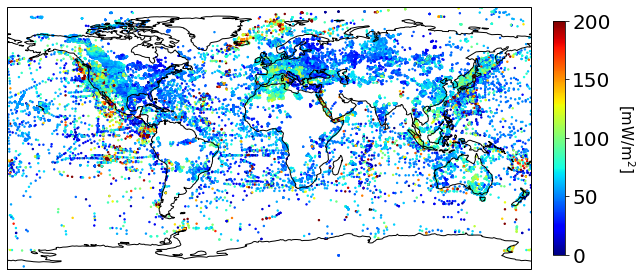

In [26]:
Lon = ThermoGlobe_HF.iloc[:,0]
Lat = ThermoGlobe_HF.iloc[:,1]
HF = ThermoGlobe_HF.iloc[:,2]
#Difference = np.sqrt((HF_measured - HF_modelled)**2)

cmap = plt.get_cmap('jet')
fig1 = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(Lon,Lat,c=HF,cmap=cmap, marker='o', s=2, vmin=0, vmax=200)
cb1 = plt.colorbar(fraction=0.021, pad=0.04)
cb1.ax.tick_params(labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cb1.set_label('[mW/m$^2$]', labelpad=25, fontsize=15, rotation=270)
#plt.xlim([105,160])
#plt.ylim([-45,-8])
plt.xlabel('Lon', fontsize=20)
plt.ylabel('Lat', fontsize=20)

In [27]:
print('heatflow_reliability:', ThermoGlobe_HF['heatflow_reliability'].unique())
ThermoGlobe_HF.loc[ThermoGlobe_HF['heatflow_reliability']=='A', 'heatflow_reliability'] = 0
ThermoGlobe_HF.loc[ThermoGlobe_HF['heatflow_reliability']=='B', 'heatflow_reliability'] = 1
ThermoGlobe_HF.loc[ThermoGlobe_HF['heatflow_reliability']=='C', 'heatflow_reliability'] = 2
ThermoGlobe_HF.loc[ThermoGlobe_HF['heatflow_reliability']=='D', 'heatflow_reliability'] = 3
ThermoGlobe_HF.loc[ThermoGlobe_HF['heatflow_reliability']=='E', 'heatflow_reliability'] = 4
ThermoGlobe_HF.loc[ThermoGlobe_HF['heatflow_reliability']=='F', 'heatflow_reliability'] = 5
ThermoGlobe_HF.loc[ThermoGlobe_HF['heatflow_reliability']=='Z', 'heatflow_reliability'] = 6
ThermoGlobe_HF.loc[ThermoGlobe_HF['heatflow_reliability']=='R', 'heatflow_reliability'] = 7
print('heatflow_reliability:', ThermoGlobe_HF['heatflow_reliability'].unique())

heatflow_reliability: ['A' nan 'B' 'C' 'D' 'E' 'F' 'Z' 'R']


C:\Users\sungw686\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


heatflow_reliability: [0 nan 1 2 3 4 5 6 7]


In [91]:
Data_A = ThermoGlobe_HF.loc[(ThermoGlobe_HF['longitude']>=110) & (ThermoGlobe_HF['longitude']<=160) & (ThermoGlobe_HF['latitude']<=-10) & (ThermoGlobe_HF['latitude']>=-50)]

Text(0, 0.5, 'Lat')

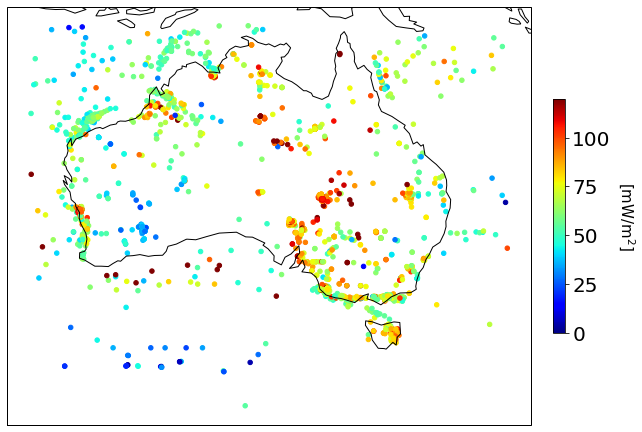

In [92]:
Lon = Data_A.iloc[:,0]
Lat = Data_A.iloc[:,1]
HF = Data_A.iloc[:,2]
#Difference = np.sqrt((HF_measured - HF_modelled)**2)

cmap = plt.get_cmap('jet')
fig1 = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(Lon,Lat,c=HF,cmap=cmap, marker='o', s=20, vmin=0, vmax=120)
cb1 = plt.colorbar(fraction=0.021, pad=0.04)
cb1.ax.tick_params(labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cb1.set_label('[mW/m$^2$]', labelpad=25, fontsize=15, rotation=270)
#plt.xlim([105,160])
#plt.ylim([-45,-8])
plt.xlabel('Lon', fontsize=20)
plt.ylabel('Lat', fontsize=20)

In [43]:
Data_I = ThermoGlobe_HF.loc[(ThermoGlobe_HF['longitude']>=75) & (ThermoGlobe_HF['longitude']<=90) & (ThermoGlobe_HF['latitude']<=25) & (ThermoGlobe_HF['latitude']>=5)]

Text(0, 0.5, 'Lat')

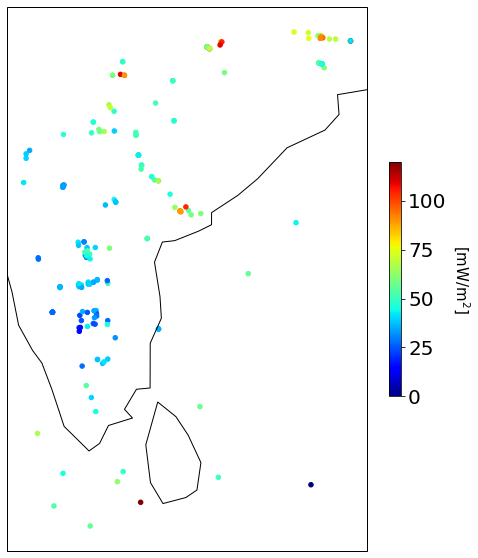

In [44]:
Lon = Data_I.iloc[:,0]
Lat = Data_I.iloc[:,1]
HF = Data_I.iloc[:,2]
#Difference = np.sqrt((HF_measured - HF_modelled)**2)

cmap = plt.get_cmap('jet')
fig1 = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(Lon,Lat,c=HF,cmap=cmap, marker='o', s=20, vmin=0, vmax=120)
cb1 = plt.colorbar(fraction=0.021, pad=0.04)
cb1.ax.tick_params(labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cb1.set_label('[mW/m$^2$]', labelpad=25, fontsize=15, rotation=270)
#plt.xlim([105,160])
#plt.ylim([-45,-8])
plt.xlabel('Lon', fontsize=20)
plt.ylabel('Lat', fontsize=20)

In [54]:
Data_Af = ThermoGlobe_HF.loc[(ThermoGlobe_HF['longitude']>=20) & (ThermoGlobe_HF['longitude']<=52) & (ThermoGlobe_HF['latitude']<=-10) & (ThermoGlobe_HF['latitude']>=-30)]

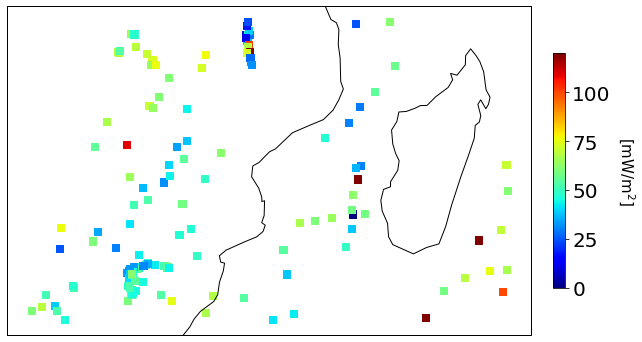

In [55]:
Lon = Data_Af.iloc[:,0]
Lat = Data_Af.iloc[:,1]
HF = Data_Af.iloc[:,2]
#Difference = np.sqrt((HF_measured - HF_modelled)**2)

cmap = plt.get_cmap('jet')
fig1 = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(Lon,Lat,c=HF,cmap=cmap, marker='s', s=50, vmin=0, vmax=120)
cb1 = plt.colorbar(fraction=0.021, pad=0.04)
cb1.ax.tick_params(labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cb1.set_label('[mW/m$^2$]', labelpad=25, fontsize=15, rotation=270)
#plt.xlim([105,160])
#plt.ylim([-45,-8])
plt.xlabel('Lon', fontsize=20)
plt.ylabel('Lat', fontsize=20)
fig1.savefig('ThermoGlobe_Africa.png')

In [93]:
frames = [Data_A, Data_I, Data_Af]
Gondwana = pd.concat(frames,ignore_index=True,sort=False)
Gondwana.head()

,longitude,latitude,heatflow_uncorrected,heatflow_corrected,heatflow_reliability
0,113.926667,-22.008333,52.0,NaN,NaN
1,116.138333,-19.755000,31.0,NaN,NaN
2,116.483333,-19.440000,60.0,NaN,NaN
3,116.358333,-19.650000,46.0,NaN,NaN
4,123.811667,-12.881667,63.0,NaN,NaN


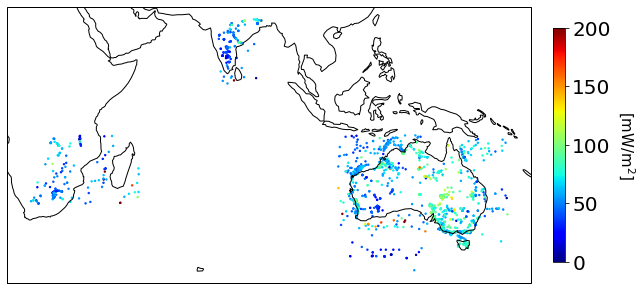

In [94]:
Lon = Gondwana.iloc[:,0]
Lat = Gondwana.iloc[:,1]
HF = Gondwana.iloc[:,2]
#Difference = np.sqrt((HF_measured - HF_modelled)**2)

cmap = plt.get_cmap('jet')
fig1 = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(Lon,Lat,c=HF,cmap=cmap, marker='o', s=2, vmin=0, vmax=200)
cb1 = plt.colorbar(fraction=0.021, pad=0.04)
cb1.ax.tick_params(labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cb1.set_label('[mW/m$^2$]', labelpad=25, fontsize=15, rotation=270)
#plt.xlim([105,160])
#plt.ylim([-45,-8])
plt.xlabel('Lon', fontsize=20)
plt.ylabel('Lat', fontsize=20)
fig1.savefig('HeatFlux_ThermoGlobe_Gondwana.png', dpi=300)

In [95]:
Gondwana.info()
Gondwana.heatflow_corrected = Gondwana.heatflow_corrected.fillna(-999)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2309 entries, 0 to 2308
Data columns (total 5 columns):
longitude               2309 non-null float64
latitude                2309 non-null float64
heatflow_uncorrected    2249 non-null float64
heatflow_corrected      127 non-null float64
heatflow_reliability    382 non-null object
dtypes: float64(4), object(1)
memory usage: 90.3+ KB


In [96]:
HF=[]
for i in range(len(Gondwana)):
    if Gondwana.iloc[i,3]!= -999:
        HF.append(Gondwana.iloc[i,3])
    else: HF.append(Gondwana.iloc[i,2])

In [97]:
print(Gondwana.iloc[43,0:5])
Gondwana['HF']= HF
df = pd.DataFrame([[180.0,90.0,np.nan,np.nan,np.nan,1.0],
                   [-180.0,90.0,np.nan,np.nan,np.nan,1.0]],columns=list(Gondwana.columns))
Gondwana = Gondwana.append(df,ignore_index=True)

longitude               139.483
latitude               -20.6833
heatflow_uncorrected       91.6
heatflow_corrected         83.3
heatflow_reliability        NaN
Name: 43, dtype: object


In [98]:
print(len(Gondwana))
Gondwana.tail(10)

2311


,longitude,latitude,heatflow_uncorrected,heatflow_corrected,heatflow_reliability,HF
2301,26.724300,-11.021200,65.0,-999.0,NaN,65.0
2302,26.924600,-11.058800,48.0,-999.0,NaN,48.0
2303,51.566667,-26.616667,66.5,-999.0,0,66.5
2304,51.316667,-28.100000,100.0,-999.0,1,100.0
2305,47.416667,-28.016667,58.6,-999.0,1,58.6
2306,40.900000,-25.116667,49.4,-999.0,1,49.4
2307,41.316667,-23.933333,38.9,-999.0,0,38.9
2308,41.300000,-22.666667,58.6,-999.0,4,58.6
2309,180.000000,90.000000,NaN,NaN,NaN,1.0
2310,-180.000000,90.000000,NaN,NaN,NaN,1.0


Add Antarctic Measurments

In [99]:
Data_ANT = pd.read_csv('GHF_Dziadek.csv')

Gondwana_test = Gondwana.append(Data_ANT,ignore_index=True,sort=False)
print(len(Gondwana_test))
Gondwana_test.tail(10)

2744


,longitude,latitude,heatflow_uncorrected,heatflow_corrected,heatflow_reliability,HF
2734,-21.5833,-70.6500,NaN,NaN,NaN,60.0
2735,-26.0500,-69.9833,NaN,NaN,NaN,84.0
2736,-20.0833,-63.1167,NaN,NaN,NaN,57.0
2737,-19.7333,-62.9833,NaN,NaN,NaN,34.0
2738,-20.0000,-62.0000,NaN,NaN,NaN,24.0
2739,-19.8500,-61.1000,NaN,NaN,NaN,84.0
2740,-33.0667,-66.2500,NaN,NaN,NaN,64.0
2741,-36.9500,-64.0667,NaN,NaN,NaN,175.0
2742,-38.4500,-63.1000,NaN,NaN,NaN,105.0
2743,-41.1667,-55.6500,NaN,NaN,NaN,81.0


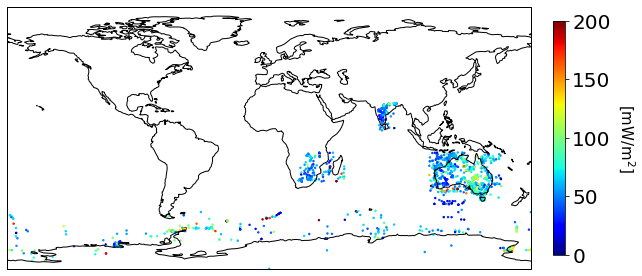

In [100]:
Lon = Gondwana_test.iloc[:,0]
Lat = Gondwana_test.iloc[:,1]
HF = Gondwana_test.iloc[:,5]
#Difference = np.sqrt((HF_measured - HF_modelled)**2)

cmap = plt.get_cmap('jet')
fig1 = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(Lon,Lat,c=HF,cmap=cmap, marker='o', s=2, vmin=0, vmax=200)
cb1 = plt.colorbar(fraction=0.021, pad=0.04)
cb1.ax.tick_params(labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cb1.set_label('[mW/m$^2$]', labelpad=25, fontsize=15, rotation=270)
#plt.xlim([105,160])
#plt.ylim([-45,-8])
plt.xlabel('Lon', fontsize=20)
plt.ylabel('Lat', fontsize=20)
fig1.savefig('HeatFlux_ThermoGlobe+ANT_Gondwana.png', dpi=300)

In [101]:
Gondwana_filtered = Gondwana_test.loc[(Gondwana_test['HF']<=200) & (Gondwana_test['HF']>=0)]
Gondwana_filtered = Gondwana_filtered[['longitude','latitude','HF']]
Gondwana_filtered.to_csv('Gondwana_HF.txt',index=False, sep=' ')
Gondwana_filtered.head()

,longitude,latitude,HF
0,113.926667,-22.008333,52.0
1,116.138333,-19.755000,31.0
2,116.483333,-19.440000,60.0
3,116.358333,-19.650000,46.0
4,123.811667,-12.881667,63.0


In [82]:
print(len(Gondwana_filtered))

2070
